In [1]:
import math
import pandas as pd
import numpy as np
import random
from statistics import mean, stdev, median, mode
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
data1 = np.loadtxt('data.csv')
#data1

In [3]:
def minimum(x,y):
    min = np.argmin(y)

    return x[min]
# x=[1,2,3,4]
# y=[5,6,7,8]
# z = minimum(x,y)
# z

In [4]:
def minimum3(x,y,z):
    min = np.argmin(z)

    return x[min], y[min], z[min]

In [5]:
def decisionRegion(clf, X, Y):
    

# Lists to hold inpoints, predictions and assigned colors
    xPred = []
    yPred = []
    cPred = []
# Use input points to get predictions here
    for xP in range(-100,100):
        xP = xP/100.0
        for yP in range(-100,100):
            yP = yP/100.0
            xPred.append(xP)
            yPred.append(yP)
            if(clf.predict([[xP,yP]])=="1.0"):
                cPred.append("b")
            else:
                cPred.append("r")

## Visualize Results
#plot the points
    mp.scatter(X,Y,s=3,c=colors)

#plot the regions
    mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
    mp.xlim(-1,1)
    mp.xlabel("Average Intensity")
    mp.ylim(-1,1)
    mp.ylabel("Intensity Variance")


In [6]:
#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data1)


features = []
digits = []


for row in data1:
    #import the data and select only the 1's and 5's
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))

        
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

In [7]:
# Q)1)

In [8]:
KPCA = KernelPCA(n_components = 2, kernel = 'poly', degree = 1)
data = KPCA.fit_transform(trainFeatures)

In [9]:
train = pd.DataFrame(data = data)
train.head()

,0,1
0,0.662562,-0.078380
1,-0.249190,-0.186351
2,0.387871,0.056345
3,0.636381,-0.098758
4,-0.171666,0.280755


Text(0.5, 1.0, 'Figure 2.1')

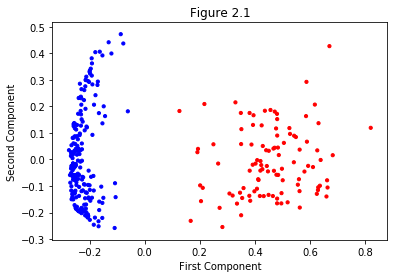

In [10]:

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")

#plot the data points



plt.scatter(train[[0]],train[[1]], s=10,c=colors)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title("Figure 2.1")

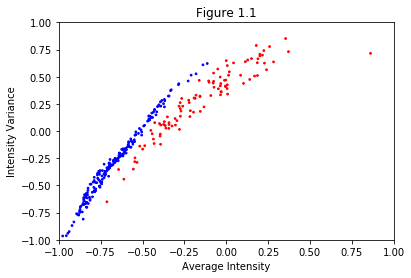

In [11]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")

#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
mp.scatter(X,Y,s=3,c=colors)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")
mp.title("Figure 1.1")
#display the current graph
mp.show()

In [12]:
# 1)a) Yes. The components of KPCA seem to seperate the data better than mean and variance components. 
#      It is evident in the figure 2.1 and 1.1 as you can see that there are less number of points near the decision region with KPCA.

In [13]:
KPCA = KernelPCA(n_components = 2, kernel = 'poly', degree = 3)
data3 = KPCA.fit_transform(trainFeatures)

In [14]:
train3 = pd.DataFrame(data = data3)
train3.head()

,0,1
0,1.704466,-0.165921
1,-0.762189,-0.610113
2,1.149909,0.109357
3,1.653838,-0.186883
4,-0.400848,0.914819


Text(0.5, 1.0, 'Figure 2.2')

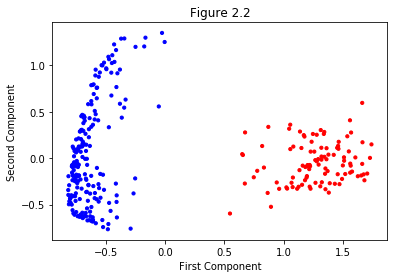

In [15]:

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")

#plot the data points



plt.scatter(train3[[0]],train3[[1]], s=10,c=colors)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title("Figure 2.2")

In [16]:
# 1)b) Yes. This kpca (degree 3) seperates the data better than the above one (degree 1) because there are less data points near the 
# decision boundary when compared to the no of data points near the decision boundary for kpca of degree 1

In [17]:
# Q)2)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


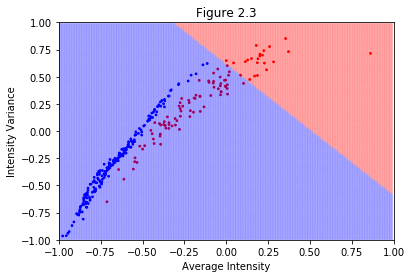

In [18]:
LR = LogisticRegression(penalty = 'l2',C = 0.01)
clf = LR.fit(simpleTrain, trainDigits)

decisionRegion(clf, X, Y)
mp.title("Figure 2.3")
mp.show()

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


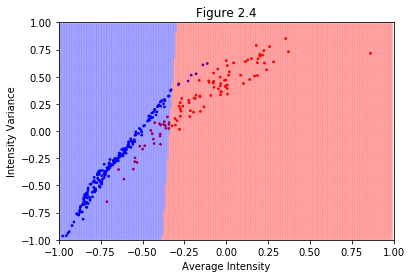

In [19]:
LR = LogisticRegression(penalty = 'l2',C = 2.0)
clf = LR.fit(simpleTrain, trainDigits)

decisionRegion(clf, X, Y)
mp.title("Figure 2.4")
mp.show()

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


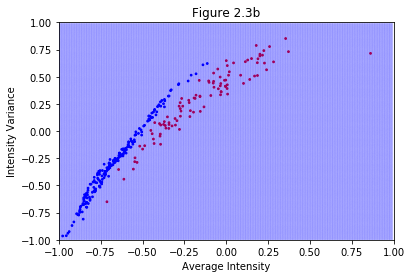

In [20]:
LR = LogisticRegression(penalty = 'l1',C = 0.01)
clf = LR.fit(simpleTrain, trainDigits)

decisionRegion(clf, X, Y)
mp.title("Figure 2.3b")
mp.show()

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


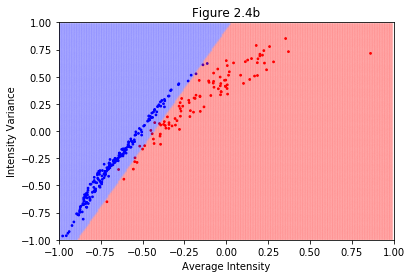

In [21]:
LR = LogisticRegression(penalty = 'l1',C = 2.0)
clf = LR.fit(simpleTrain, trainDigits)


decisionRegion(clf, X, Y)
mp.title("Figure 2.4b")
mp.show()

In [22]:
#Q) 2) Graduate student question:

#  From the figures 2.3 and 2.3b, for C = 0.01, both l1 and l2 underfit the data but l1 completely underfit the data  
#  For C = 2.0, the regularization techniques behaved conversely, l1 has less number of training errors compared to l2 
#  It looks like the regularizaton parameter C has more role to play than regularization techniques in making a model overfit or underfit. 

In [23]:
# Q) 3)

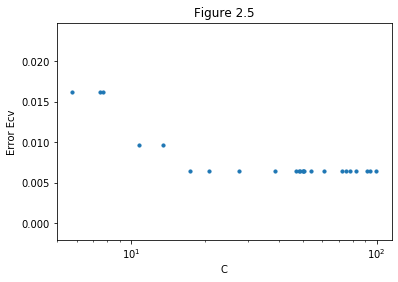

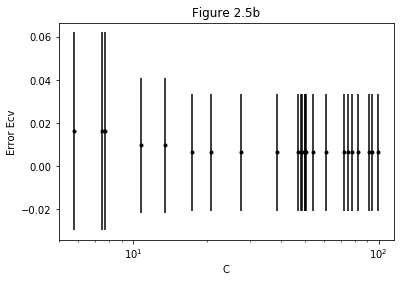

In [24]:
# USING 2D dimensional data
x = []
y = []
z = []
p =[]
for i in range(1,25):
    c = np.random.uniform(0.01,100)
    model2  = SVC(C= c, gamma= 'auto')
    #model2.predict(testFeatures)
    cvs = cross_val_score(model2, simpleTrain, trainDigits, cv = 10, scoring='accuracy')
    err = 1-cvs
    evsm = 1-(cvs.mean())
    p.append(err)
    x.append(c)
    y.append(evsm)
    z.append([x,evsm])

# print(len(x))
# print(len(y))
# print(count)   
mp.scatter(x,y, s=10)
mp.xlabel("C")
mp.xscale('log')
mp.ylabel("Error Ecv")
mp.title("Figure 2.5")
mp.show()

m=[]
std =[]
#print(y)
for i in range(len(p)):
    m.append(mean(p[i]))
    std.append(2*stdev(p[i]))
    

mp.errorbar(x, m, yerr=std, fmt='.k');

mp.xlabel("C")
mp.xscale('log')
mp.ylabel("Error Ecv")
mp.title("Figure 2.5b")
mp.show()

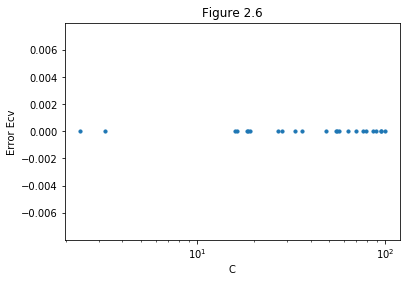

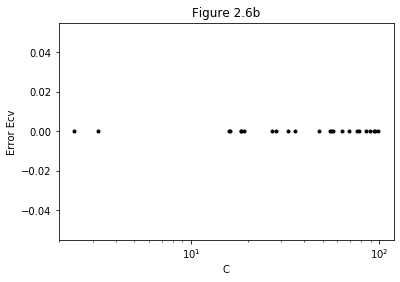

In [25]:
# USING 256D dimensional data
x256 = []
y256 = []
p256 =[]
for i in range(1,25):
    c256 = np.random.uniform(0.01,100)
    model2  = SVC(C= c256, gamma= 'auto')
    #model2.predict(testFeatures)
    cvs256 = cross_val_score(model2, trainFeatures, trainDigits, cv = 10, scoring='accuracy')
    err256 = 1-cvs256
    evsm256 = 1-(cvs256.mean())
    p256.append(err256)
    x256.append(c256)
    y256.append(evsm256)

# print(len(x))
# print(len(y))
# print(count)   
mp.scatter(x256,y256, s=10)
mp.xlabel("C")
mp.xscale('log')
mp.ylabel("Error Ecv")
mp.title("Figure 2.6")
mp.show()

m256=[]
std256 =[]
#print(y)
for i in range(len(p256)):
    m256.append(mean(p256[i]))
    std256.append(2*stdev(p256[i]))
    

mp.errorbar(x256, m256, yerr=std256, fmt='.k');

mp.xlabel("C")
mp.xscale('log')
mp.ylabel("Error Ecv")
mp.title("Figure 2.6b")
mp.show()

In [26]:
# from Figure 2.5, the error is low for x = 3
c_opt = minimum(x,y) 
c_opt

91.37569810087598

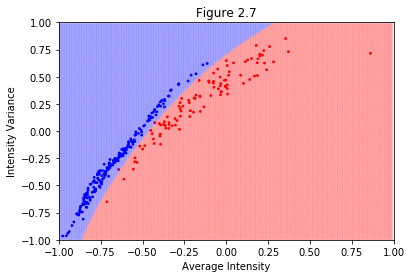

In [27]:
svm = SVC(C = c_opt, gamma= 'auto')
clf = svm.fit(simpleTrain, trainDigits)

decisionRegion(clf, X, Y)
mp.title("Figure 2.7")
mp.show()

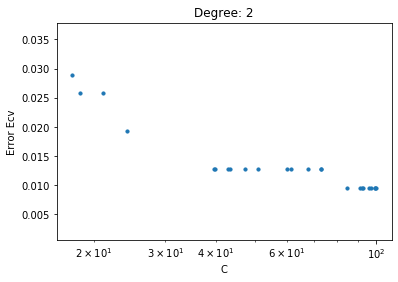

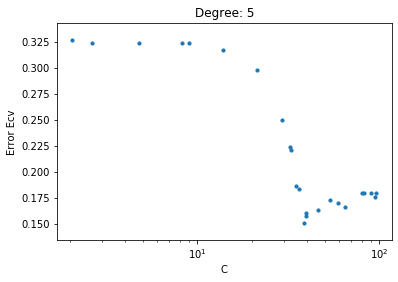

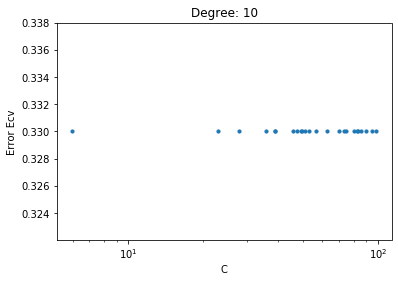

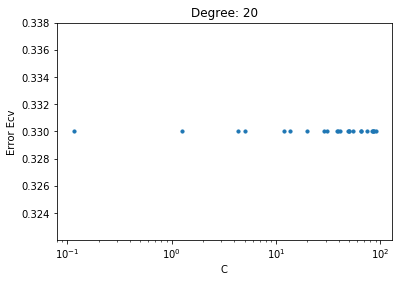



Optimal C Values for Degrees [2, 5, 10, 20] are: [92.43749300503877, 38.46581334768249, 50.928567409015486, 1.2483293853873412]


Min Ecv Value is: 0.009576612903225756
Optimal degree is: 2
Optimal C Value is: 92.43749300503877


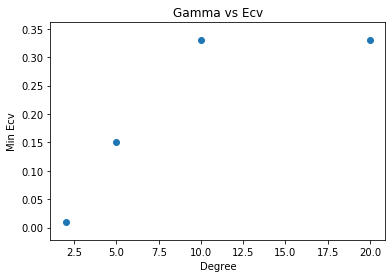

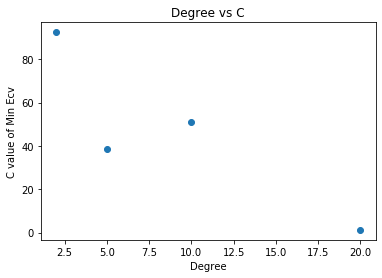

In [28]:
# Gamma vs Degree
x1 = []
y1 = []
z1 = []
p1 =[]
c_opt4 = []
degree = [2,5, 10, 20]
r= []
for i in degree:
    x = []
    y = []
    z = []
    p =[]
    for j in range(1,25):
        c = np.random.uniform(0.01,100)    
        svm = SVC(kernel = 'poly', C = c, degree = i, gamma= 'auto')
        cvs = cross_val_score(svm, simpleTrain, trainDigits, cv = 10, scoring='accuracy', n_jobs = -1)
        err = 1-cvs
        evsm = 1-(cvs.mean())
        p.append(err)
        x.append(c)
        y.append(evsm)
        z.append(i)
        p1.append(err)
        x1.append(c)
        y1.append(evsm)
        z1.append(i)
    coptimal = minimum(x,y)
    c_opt4.append(coptimal)
    r.append(y[np.argmin(y)])
    mp.scatter(x,y, s=10)
    mp.xlabel("C")
    mp.xscale('log')
    mp.ylabel("Error Ecv")
    mp.title("Degree: " + str(i))
    mp.show()
#     svm = SVC(kernel = 'poly', C = coptimal, degree = i, gamma= 'auto')
#     svm.fit(simpleTrain, trainDigits)
#     decisionRegion(svm, X, Y)
#     mp.title("Degree: " + str(i))
#     mp.show()

print('\n')
print("Optimal C Values for Degrees " + str(degree) +" are: " + str(c_opt4))

d_opt, c_optf, Min_Ecv = minimum3(z1,x1,y1)
print('\n')
print("Min Ecv Value is: " + str(Min_Ecv))
print("Optimal degree is: " + str(d_opt))
print("Optimal C Value is: " + str(c_optf))


plt.scatter(degree,r)
plt.xlabel('Degree')
plt.ylabel('Min Ecv')
plt.title('Gamma vs Ecv')
plt.show()

plt.scatter(degree,c_opt4)
plt.xlabel('Degree')
plt.ylabel('C value of Min Ecv')
plt.title('Degree vs C')  
plt.show()

In [29]:
# Q) 3) 
# With smaller degree, there is higher chance of overfitting so, to compensate that we need a greater C value which gave me lesser Ecv. 
#   And in case of higher degree which causes overfitting, we need smaller C value to get less cross validation error Ecv
#   It is evident in the above observations.

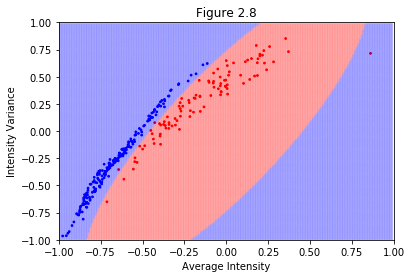

In [30]:
svm = SVC(C = c_optf, kernel = 'poly', degree = d_opt, gamma= 'auto')
clf = svm.fit(simpleTrain, trainDigits)

decisionRegion(clf, X, Y)
mp.title("Figure 2.8")
mp.show()

In [31]:
# Q)3) From the above plot, it is evident that this SVM model is best in terms of seperating the training data. 

In [32]:
# Graduate Student Question

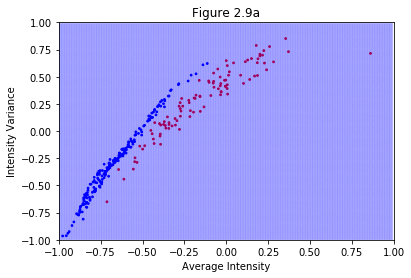

In [33]:
svm = SVC(C = 0.000001, gamma = 'auto')
clf = svm.fit(simpleTrain, trainDigits)


decisionRegion(clf, X, Y)
mp.title("Figure 2.9a")
mp.show()

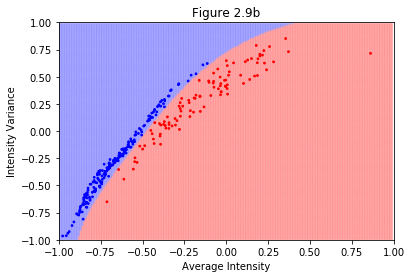

In [34]:
svm = SVC(C = 10000, gamma = 'auto')
clf = svm.fit(simpleTrain, trainDigits)

decisionRegion(clf, X, Y)
mp.title("Figure 2.9b")
mp.show()

In [35]:
# Q)3) Graduate Student Question
# When C is low, the hinge loss would be high and svm model produces high margin and the model underfits. It is evident in the figure 2.9a
# When C is high, the hinge loss would be low and SVM model tries to overfit the data. Check the figure 2.9b

In [36]:
# Extra Credit

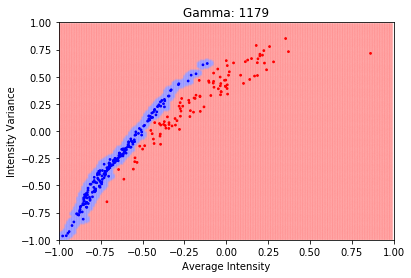

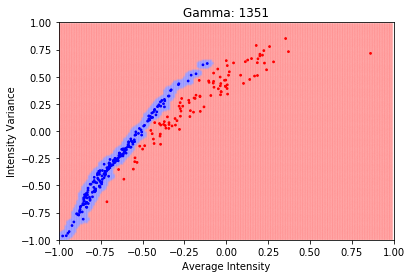

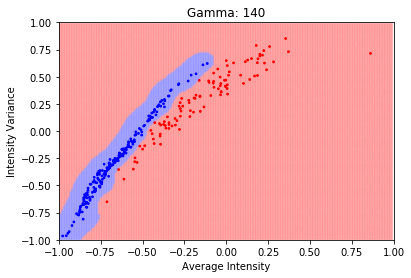

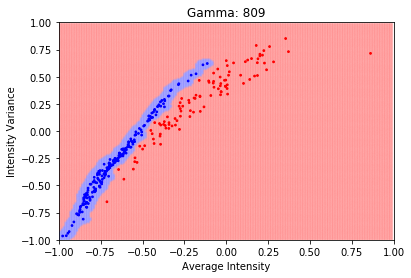

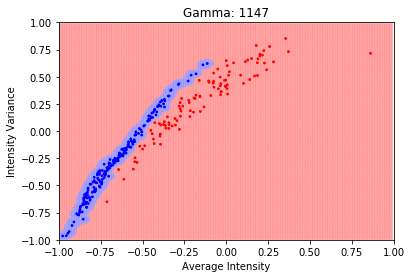

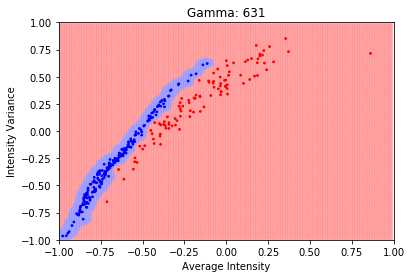

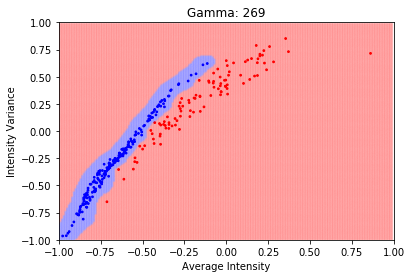

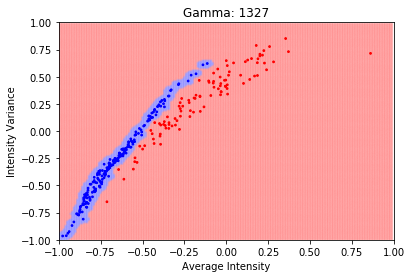

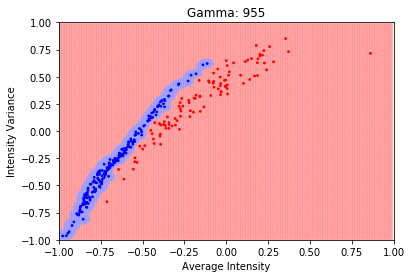

Optimal Value of Gamma = 631


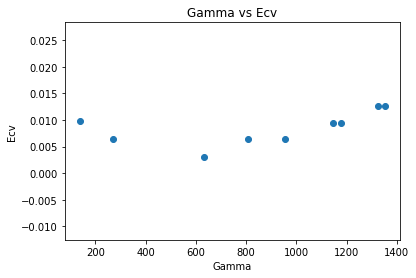

In [37]:
# Varying only C. Keeping C and Gamma constant
x = []
y = []
z = []
p =[]
degree = [2,5,10,20]

for i in range(1,10):
    gamma = np.random.randint(1,1500)    
    svm = SVC(kernel = 'rbf', gamma= gamma)
    cvs = cross_val_score(svm, simpleTrain, trainDigits, cv = 10, scoring='accuracy')
    err = 1-cvs
    evsm = 1-(cvs.mean())
    p.append(err)
    x.append(gamma)
    y.append(evsm)
    z.append([x,evsm])
    svm.fit(simpleTrain, trainDigits)
    decisionRegion(svm,X, Y)
    mp.title("Gamma: " + str(gamma))
    mp.show()

z = minimum(x,y)
print("Optimal Value of Gamma = " + str(z))
mp.scatter(x,y)
mp.xlabel('Gamma')
mp.ylabel('Ecv')
mp.title("Gamma vs Ecv")
mp.show()

In [38]:
# From the above plots, we could say that the models with smaller values of gamma underfit the data. 
# And the models with greater values of gamma formed smaller islands i.e. overfit the data.

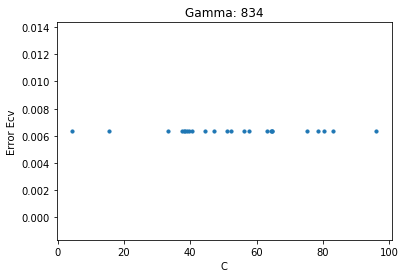

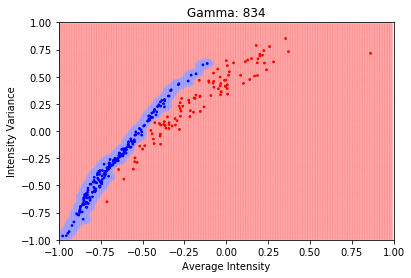

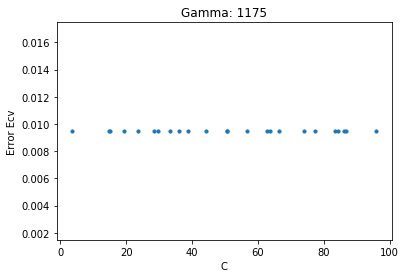

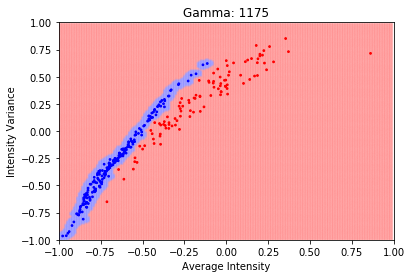

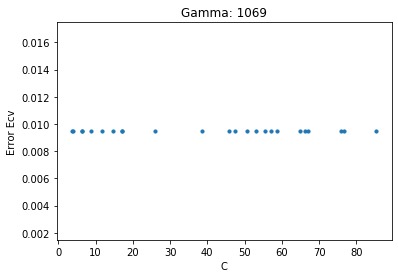

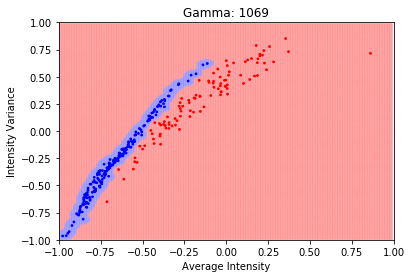

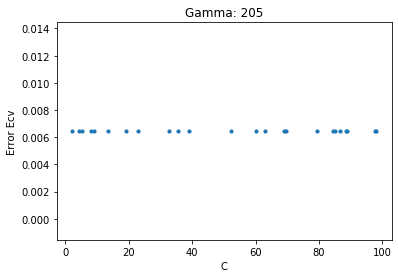

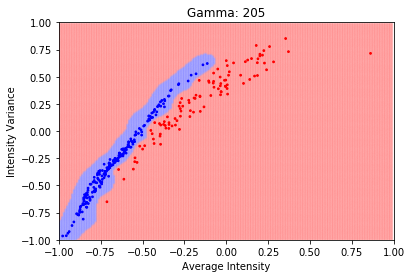



Optimal C Values for Gamma [834, 1175, 1069, 205] are: [56.35449406742604, 83.44924095746192, 11.683787668967264, 63.033547798534364]


Min Ecv Value is: 0.006350806451612789
Optimal Gamma is: 834
Optimal C Value is: 56.35449406742604


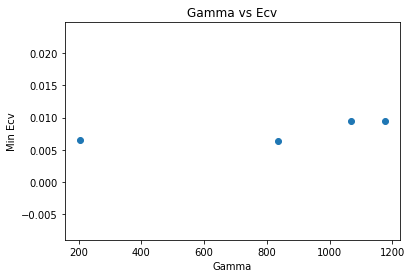

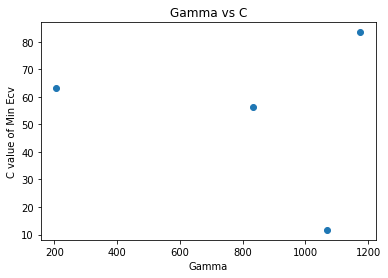

In [39]:
# Varying both C and Gamma
x1 = []
y1 = []
z1 = []
p1 =[]
c_opt4 = []
g =[]
r =[]

for i in range(1,5):
    x = []
    y = []
    z = []
    p =[]
    gamma = np.random.randint(1,1500)
    g.append(gamma)
    for j in range(1,25):
        c = np.random.uniform(0.01,100)    
        svm = SVC(kernel = 'rbf', C = c, gamma= gamma)
        cvs = cross_val_score(svm, simpleTrain, trainDigits, cv = 10, scoring='accuracy', n_jobs = -1)
        err = 1-cvs
        evsm = 1-(cvs.mean())
        p.append(err)
        x.append(c)
        y.append(evsm)
        z.append(gamma)
        p1.append(err)
        x1.append(c)
        y1.append(evsm)
        z1.append(gamma)
    coptimal = minimum(x,y)
    c_opt4.append(coptimal)
    r.append(y[np.argmin(y)])
    mp.scatter(x,y, s=10)
    mp.xlabel("C")
    mp.ylabel("Error Ecv")
    mp.title("Gamma: " + str(gamma))
    mp.show()
    svm = SVC(kernel = 'rbf', C = coptimal, gamma= gamma)
    svm.fit(simpleTrain, trainDigits)
    decisionRegion(svm, X, Y)
    mp.title("Gamma: " + str(gamma))
    mp.show()

print('\n')
print("Optimal C Values for Gamma " + str(g) +" are: " + str(c_opt4))

g_opt, c_optf, Min_Ecv = minimum3(z1,x1,y1)
print('\n')
print("Min Ecv Value is: " + str(Min_Ecv))
print("Optimal Gamma is: " + str(g_opt))
print("Optimal C Value is: " + str(c_optf))

plt.scatter(g,r)
plt.xlabel('Gamma')
plt.ylabel('Min Ecv')
plt.title('Gamma vs Ecv')
plt.show()

plt.scatter(g,c_opt4)
plt.xlabel('Gamma')
plt.ylabel('C value of Min Ecv')
plt.title('Gamma vs C')  
plt.show()


In [40]:
# As models with higher values of Gamma tend to overfit the data, we need smaller value of C to get minimum cross validation error.
# Similarly, we need higher value of C for models with smaller value of Gamma as these models tend to underfit the data
# It makes sense from the above Gamma vs C plot

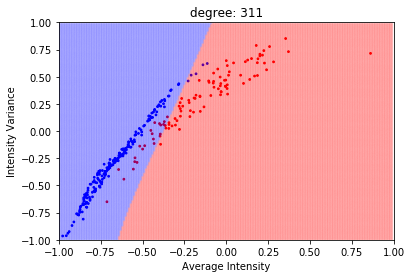

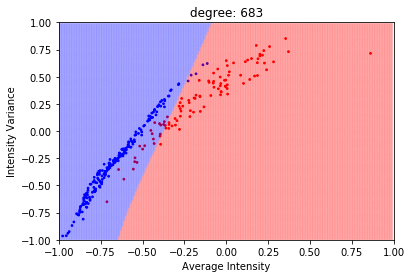

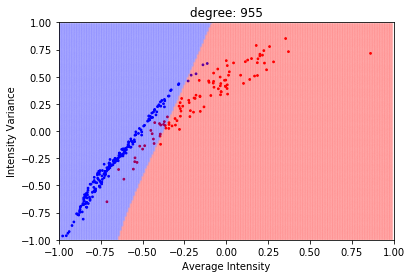

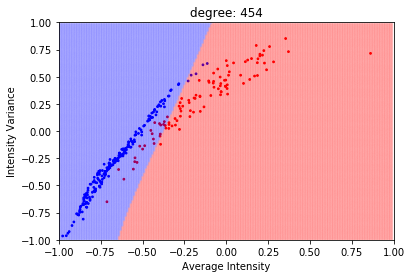

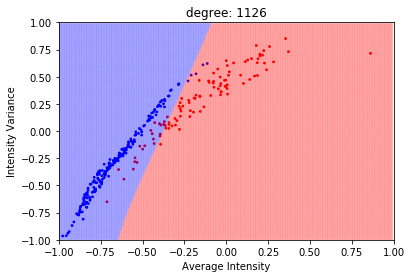

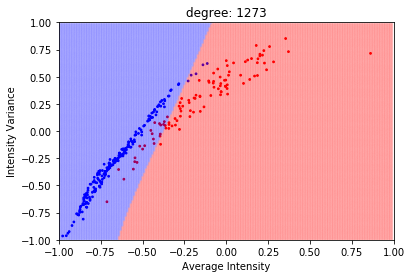

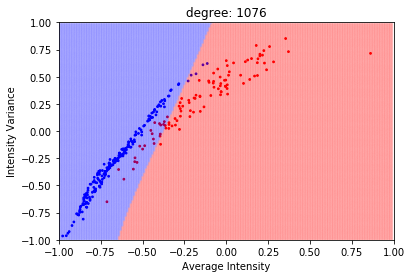

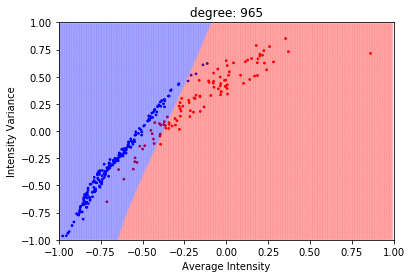

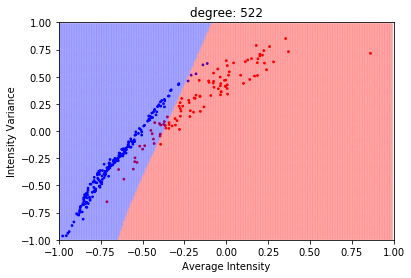

In [41]:
# Varying only degree. Keeping C and Gamma constant
x = []
y = []
z = []
p =[]
degree = [2,5,10,20]

for i in range(1,10):
    degree = np.random.randint(1,1500)    
    svm = SVC(kernel = 'rbf', gamma= 'auto', degree = degree)
    cvs = cross_val_score(svm, simpleTrain, trainDigits, cv = 10, scoring='accuracy')
    err = 1-cvs
    evsm = 1-(cvs.mean())
    p.append(err)
    x.append(gamma)
    y.append(evsm)
    z.append([x,evsm])
    svm.fit(simpleTrain, trainDigits)
    decisionRegion(svm,X, Y)
    mp.title("degree: " + str(degree))
    mp.show()




In [42]:
# As you can see in above plots, the parameter degree has no effect on the model performance. 
# This makes sense as degree parameter is only valid for the poly kernel